In [1]:
import pandas as pd

In [2]:
def read_file(file_path, flag_col, value_col):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    data_start = next(i for i, line in enumerate(lines) if line.startswith('---')) + 1
    data_lines = [line.strip().split() for line in lines[data_start:]
                  if line.strip() and len(line.split()) > max(flag_col, value_col)]

    df = pd.DataFrame(data_lines)
    df[0] = pd.to_datetime(df[0], errors='coerce')  # Time column
    df[flag_col] = pd.to_numeric(df[flag_col], errors='coerce')
    df[value_col] = pd.to_numeric(df[value_col], errors='coerce')
    df = df.rename(columns={0: 'time', flag_col: 'Flag', value_col: 'Value'})
    df = df[['time', 'Flag', 'Value']].dropna()

    return df

In [4]:
# Keep only quality flags 10, 11, 12

df = df[df['Flag'].isin([10, 11, 12])]

# Remove top/bottom 1% outliers
q_low = df['Value'].quantile(0.01)
q_high = df['Value'].quantile(0.99)
df = df[(df['Value'] >= q_low) & (df['Value'] <= q_high)]


NameError: name 'df' is not defined

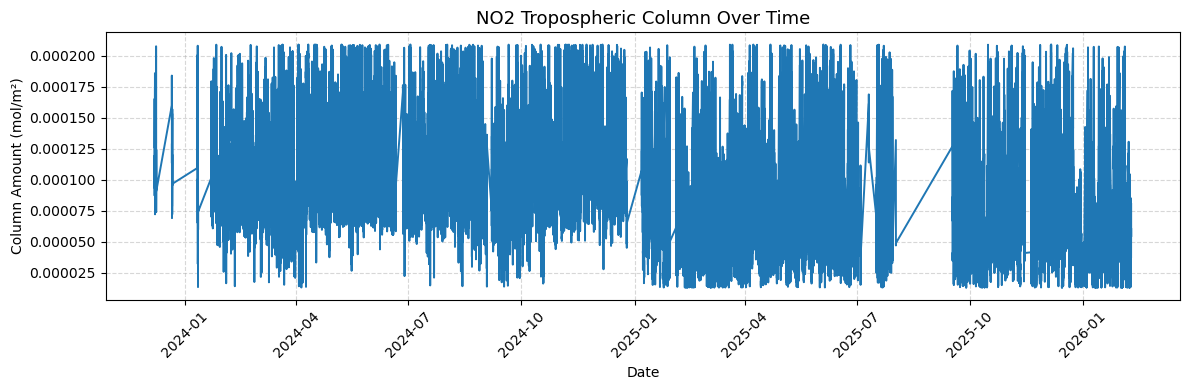

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df['time'], df['Value'], label='NO2_TROP', color='tab:blue', linewidth=1.4)

ax.set_title("NO2 Tropospheric Column Over Time", fontsize=13)
ax.set_xlabel("Date")
ax.set_ylabel("Column Amount (mol/m²)")
ax.grid(True, linestyle='--', alpha=0.5)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
df = read_file('Pandora253s1_TucsonAZ_L2_rfus5p1-8.txt', flag_col=35, value_col=38)

/var/folders/91/tmzh46hs1_vghy7y94yp_4_w0000gn/T/ipykernel_15658/3189897413.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[0] = pd.to_datetime(df[0], errors='coerce')  # Time column


In [22]:
# Keep only quality flags 10, 11, 12

df1 = df[df['Flag'].isin([10, 11, 12])]

# Remove top/bottom 1% outliers
q_low = df1['Value'].quantile(0.01)
q_high = df1['Value'].quantile(0.99)
df1 = df1[(df1['Value'] >= q_low) & (df1['Value'] <= q_high)]


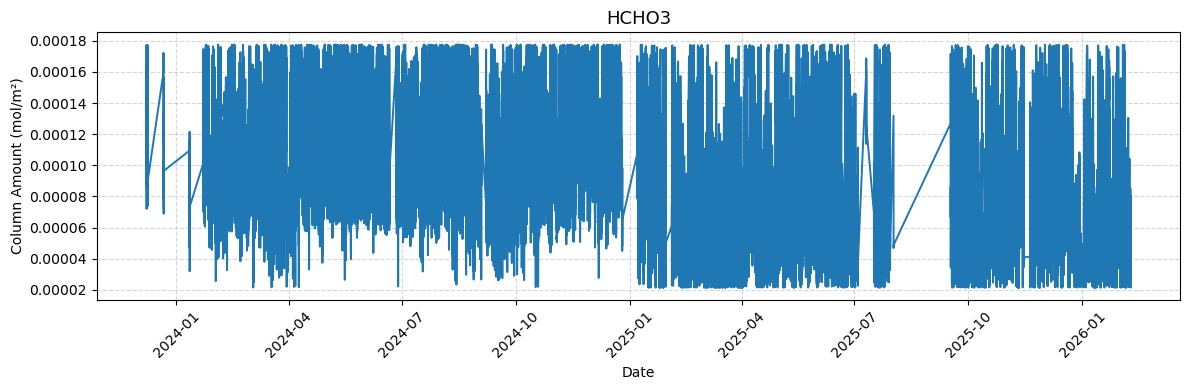

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df1['time'], df1['Value'], label='idk', color='tab:blue', linewidth=1.4)

ax.set_title("HCHO3", fontsize=13)
ax.set_xlabel("Date")
ax.set_ylabel("Column Amount (mol/m²)")
ax.grid(True, linestyle='--', alpha=0.5)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()